# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data = pd.read_csv('Wholesale_Data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [44]:
#Renaming columns which is mispelled
data.rename(columns = {'Delicassen': 'Delicassen'}, inplace = True)

In [45]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [46]:
data.isnull().sum() #Checking for missing values

data.duplicated().sum() #Checking for duplicates

np.int64(0)

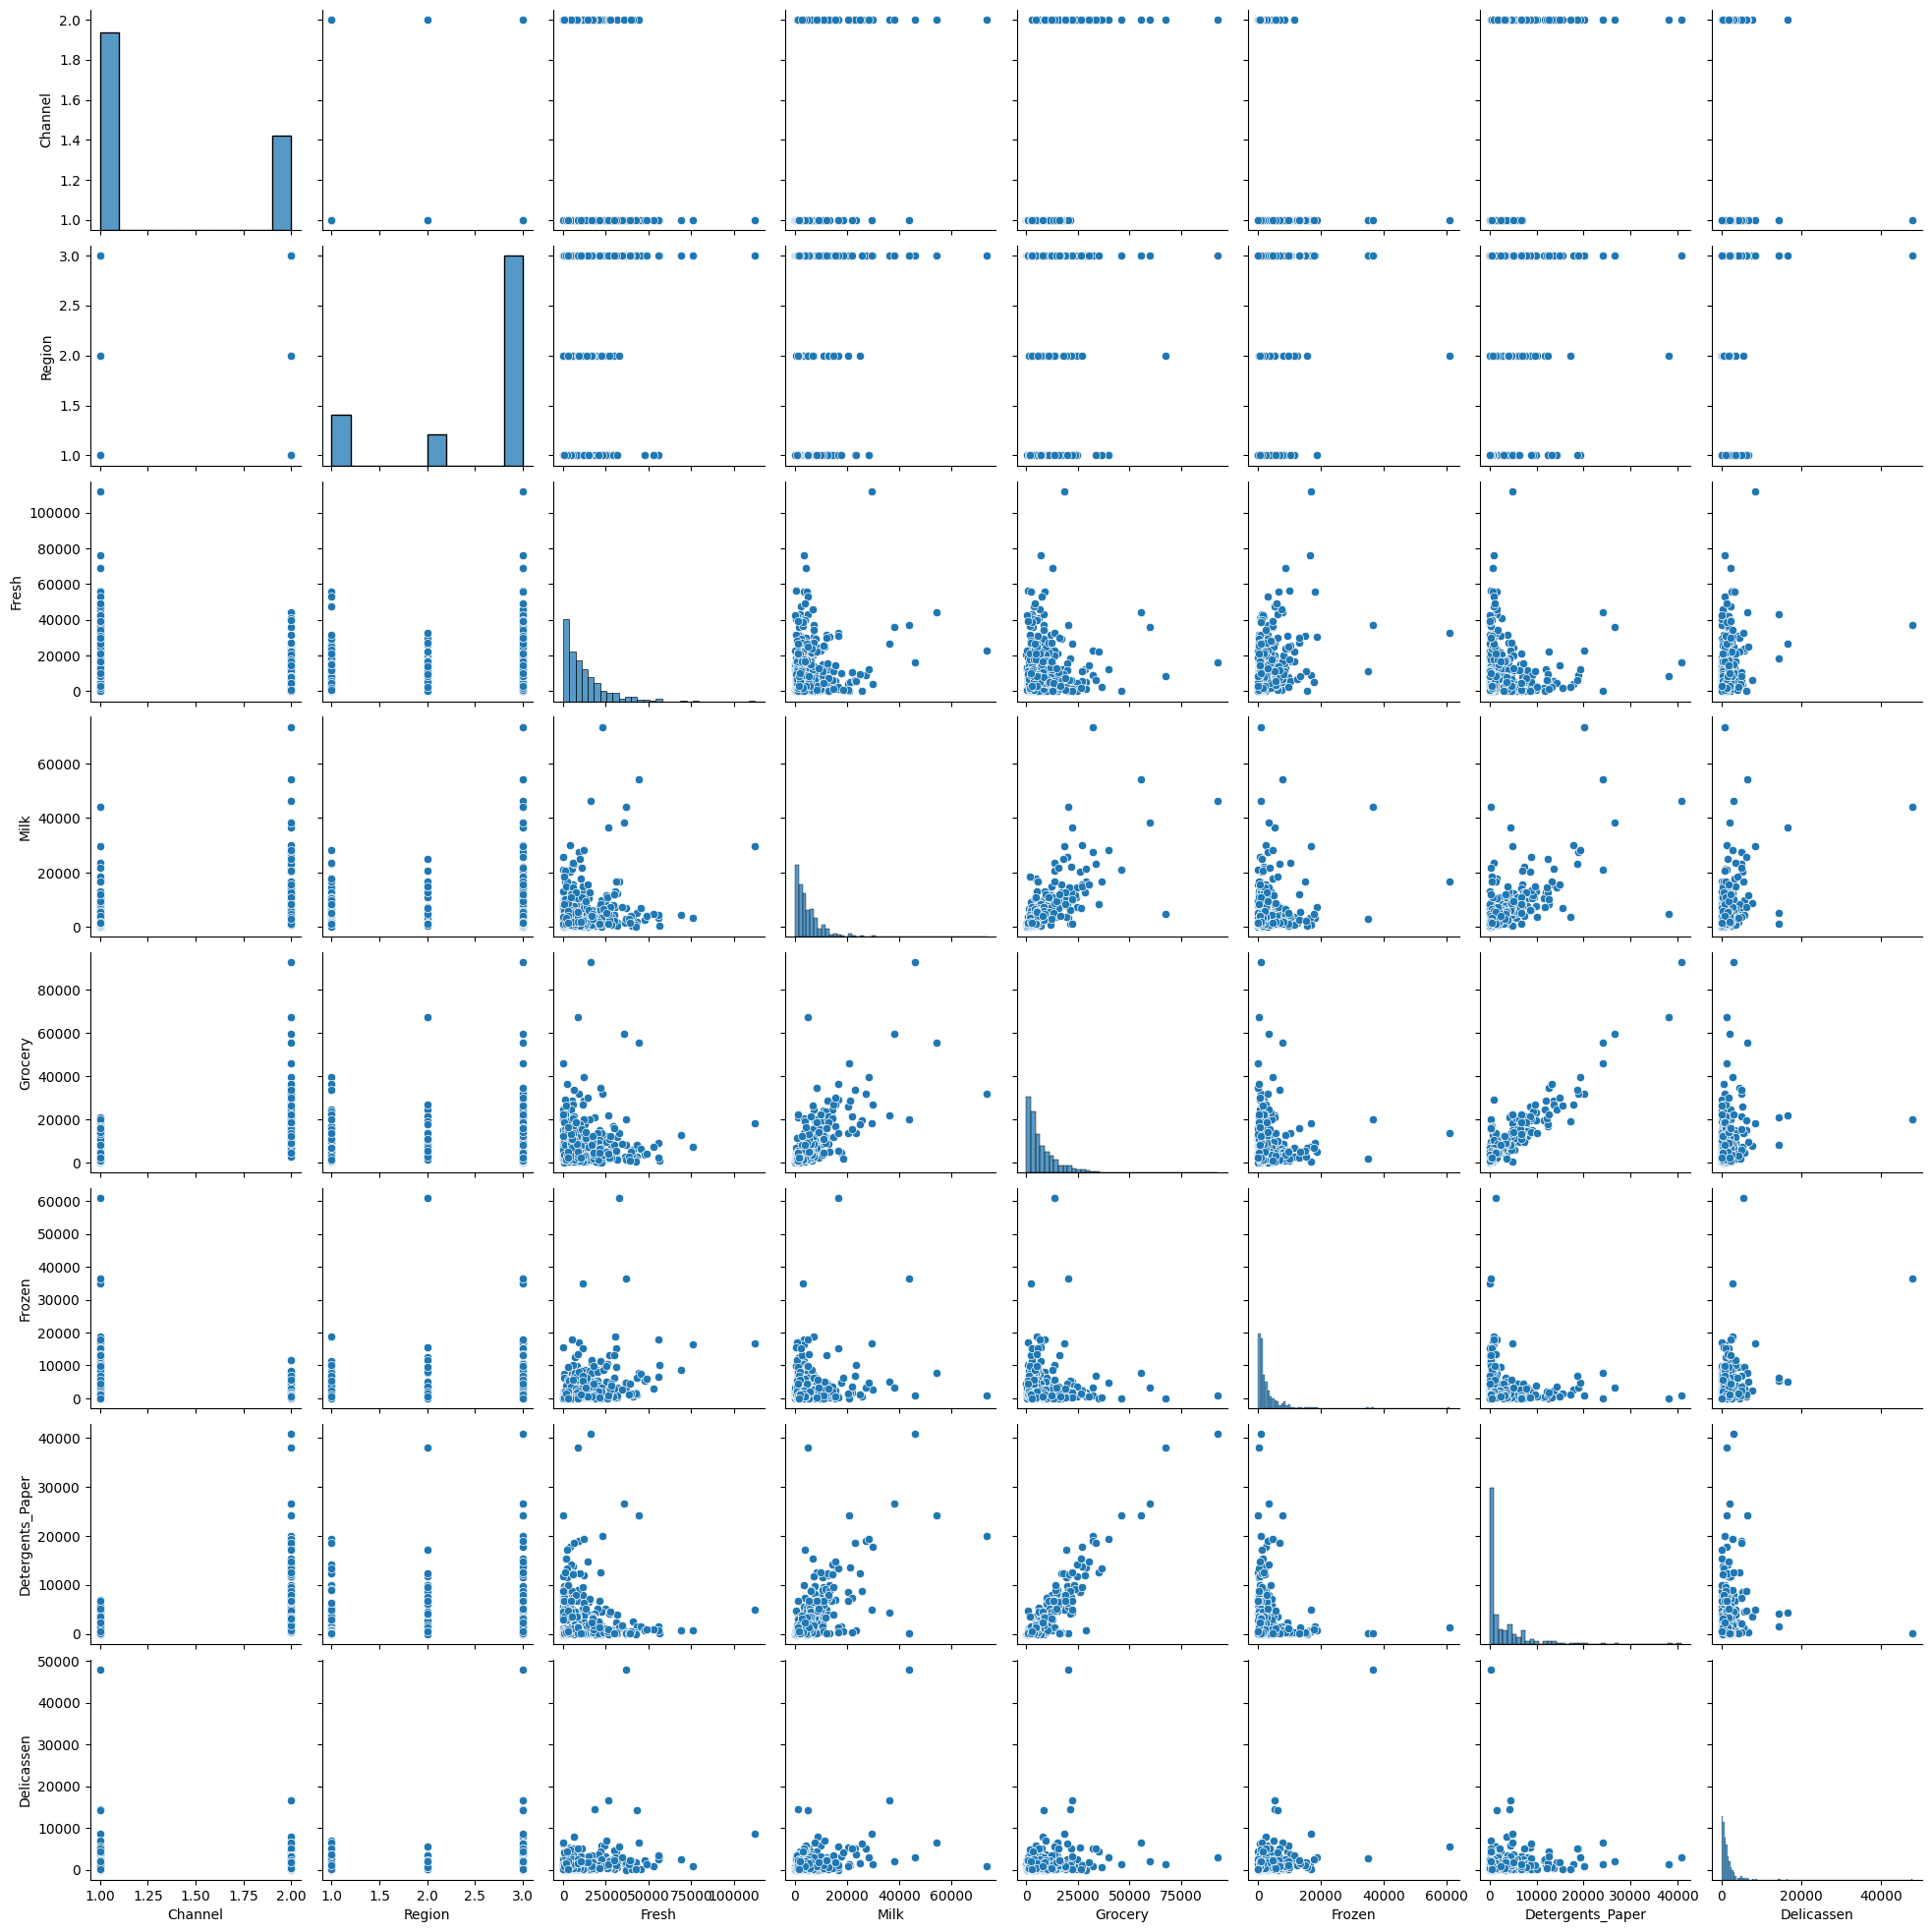

In [47]:
sns.pairplot(data)

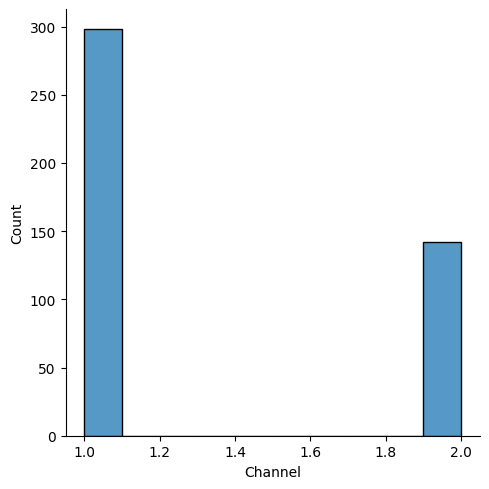

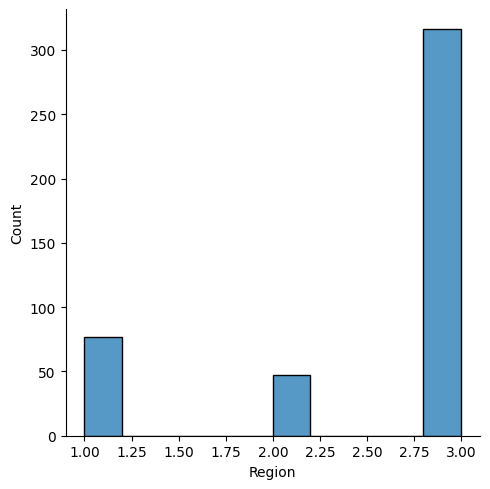

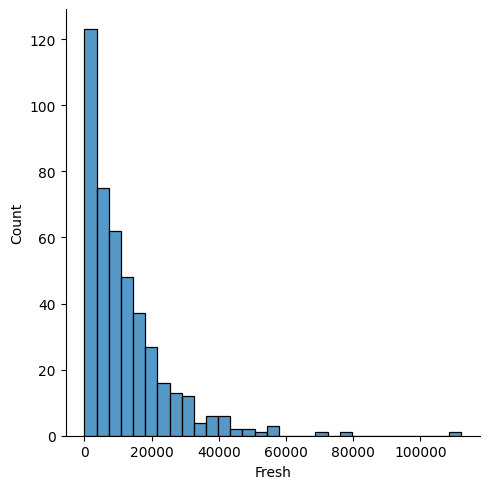

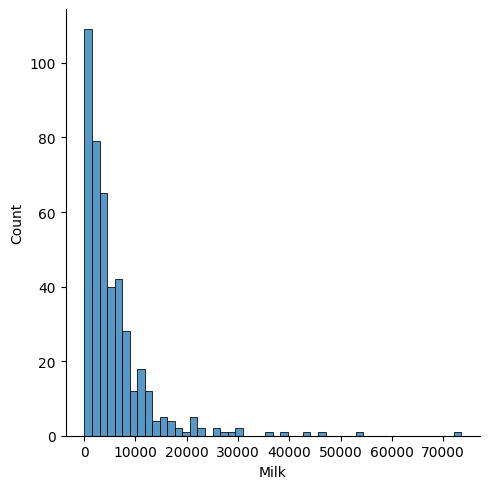

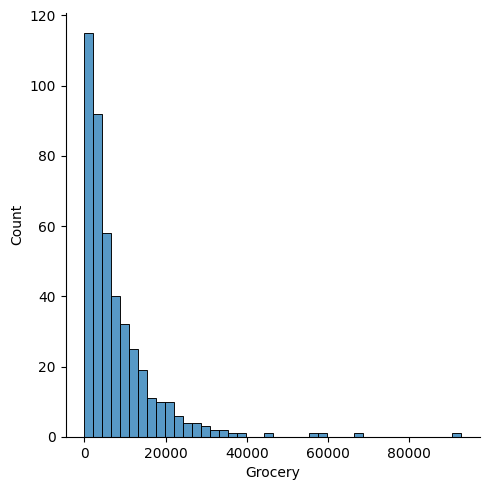

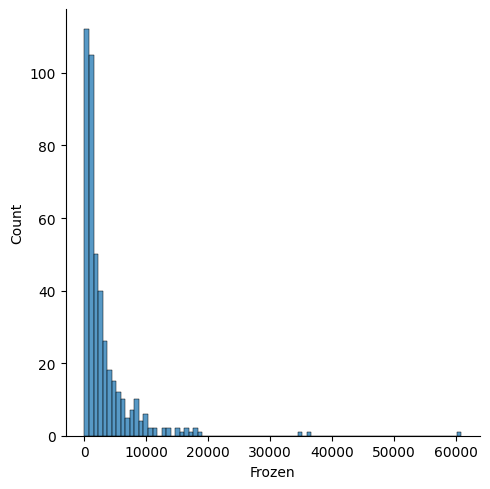

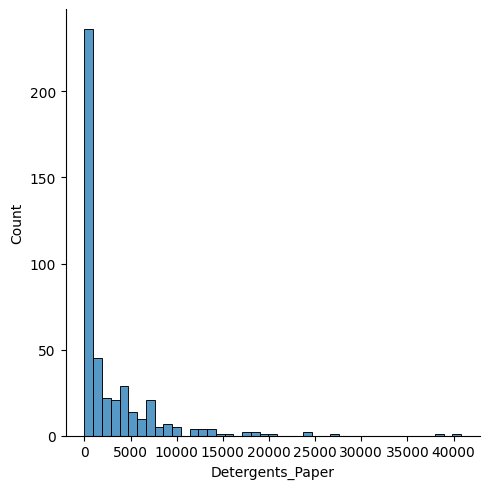

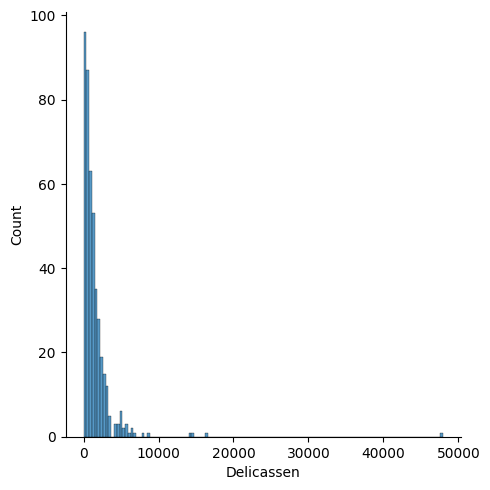

In [48]:
#Plot Distribution of each feature
#Iterate through dataframe and polot the distribution
for col in data.columns:
    plt.figsize = (3,3)
    sns.displot(data[col])
    plt.show()


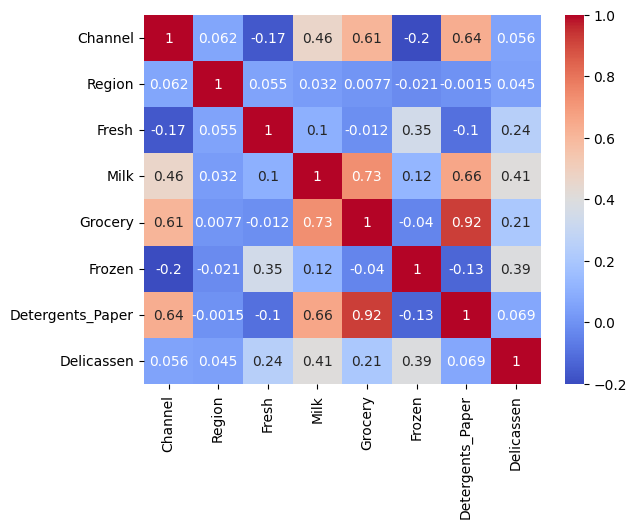

In [49]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm')
plt.show()

In [50]:
print(correlation_matrix)

                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery                   0.924641

In [ ]:
#Using Correlation Matrix to reduce features 

numeric_features = data.drop(columns=['Channel', 'Region'])  # Exclude non-numeric columns

#New Correlation Matrix
correlation_matrix = numeric_features.corr()

threshold = 0.8 

#Identify features to drop

# Create a set
to_drop = set()

# Iterate through the correlation matrix
for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if col != row and abs(correlation_matrix.loc[row, col]) > threshold:
            
            to_drop.add(col)

#Drop Correlated features 
df_reduced = numeric_features.drop(columns=to_drop)

# Display the resulting DataFrame and the dropped features
print("Dropped features:", to_drop)
print("Remaining features")
print(df_reduced.head())


Dropped features: {'Grocery', 'Detergents_Paper'}
Remaining features
   Fresh  Milk  Frozen  Delicassen
0  12669  9656     214        1338
1   7057  9810    1762        1776
2   6353  8808    2405        7844
3  13265  1196    6404        1788
4  22615  5410    3915        5185


In [52]:
#Check and remove duplicates
duplicates = data.duplicated().sum() #No duplicates 

#identify potential outliers using the IQR method
Q1 = data.iloc[:, 2:].quantile(0.25)  # First quartile (ignoring categorical columns)
Q3 = data.iloc[:, 2:].quantile(0.75)  # Third quartile
IQR = Q3 - Q1

# Define outliers as values
outliers = ((data.iloc[:, 2:] < (Q1 - 1.5 * IQR)) | (data.iloc[:, 2:] > (Q3 + 1.5 * IQR))).sum()

# Display results
duplicates, outliers


(np.int64(0),
 Fresh               20
 Milk                28
 Grocery             24
 Frozen              43
 Detergents_Paper    30
 Delicassen          27
 dtype: int64)

In [53]:
from scipy.stats.mstats import winsorize
#Check if removing outliers improves model performance 

# Winsorize each numerical column
df_winsorized = df_reduced.copy()
for col in df_reduced.columns[2:]:
    df_winsorized[col] = winsorize(df_reduced[col], limits=[0.05, 0.05])  #Remove 5% of outliers on each side


In [54]:
df_winsorized.head()

,Fresh,Milk,Frozen,Delicassen
0,12669,9656,214,1338
1,7057,9810,1762,1776
2,6353,8808,2405,4478
3,13265,1196,6404,1788
4,22615,5410,3915,4478


In [55]:
df_winsorized.describe()

c:\Users\lai29\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4809: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\lai29\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4809: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\lai29\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4809: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\lai29\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4809: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,Fresh,Milk,Frozen,Delicassen
count,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,2662.370455,1299.920455
std,12647.328865,7380.377175,2769.712228,1163.450024
min,3.000000,55.000000,137.000000,64.000000
25%,3127.750000,1533.000000,742.250000,408.250000
50%,8504.000000,3627.000000,1526.000000,965.500000
75%,16933.750000,7190.250000,3554.250000,1820.250000
max,112151.000000,73498.000000,9927.000000,4478.000000


In [56]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [57]:
#Import KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [58]:
scaler = StandardScaler() #Scale the Data
df_scaled = scaler.fit_transform(df_reduced)

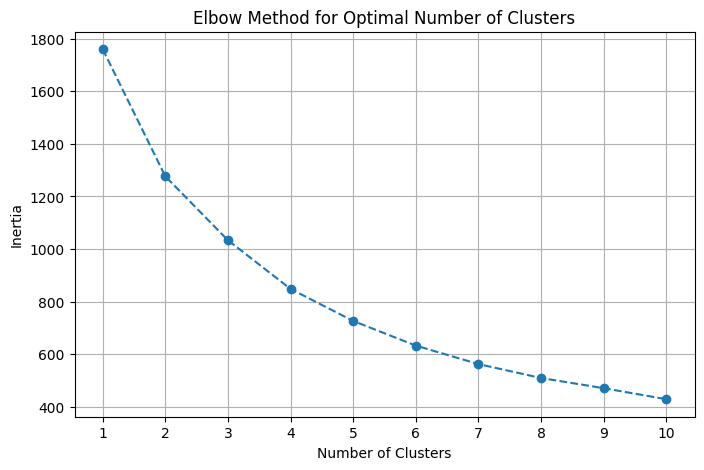

In [59]:


# Finding the optimal number of clusters using the Elbow Method

"""
Elbow Visualization from Compass K-means Tutorial 
"""
inertia = []
k_range = range(1, 11)  # Testing K values from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_range)
plt.grid()
plt.show()

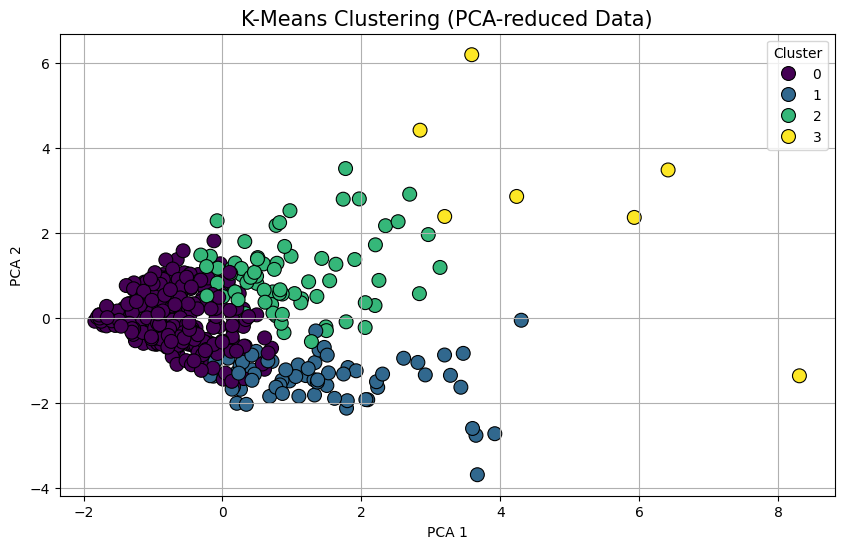

In [60]:
# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(df_scaled)

df['Cluster'] = kmeans.labels_ #Assign cluster labels

df.head()

pca = PCA(n_components=2) #Utilizing PCA to reduce dimensionality for visualization of clusters
df_pca_visual = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca_visual[:, 0], y=df_pca_visual[:, 1], hue=df['Cluster'], palette='viridis', s=100, edgecolor='k')
plt.title('K-Means Clustering (PCA-reduced Data)', fontsize=15)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [61]:
from sklearn.metrics import silhouette_score

kmeans_labels = kmeans.fit_predict(df_scaled)
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")


K-Means Silhouette Score: 0.3693473221138182


In [62]:
# Scale the winsorized data
winsor_scaled = scaler.fit_transform(df_winsorized)

#Initialize the same model
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
winsor_model = kmeans.fit(winsor_scaled)


kmeans_labels = winsor_model.fit_predict(winsor_scaled)
kmeans_silhouette_winsor = silhouette_score(winsor_scaled, kmeans_labels)
print(f"K-Means Winsorized Silhouette Score: {kmeans_silhouette_winsor}")

K-Means Winsorized Silhouette Score: 0.43478048126903496


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

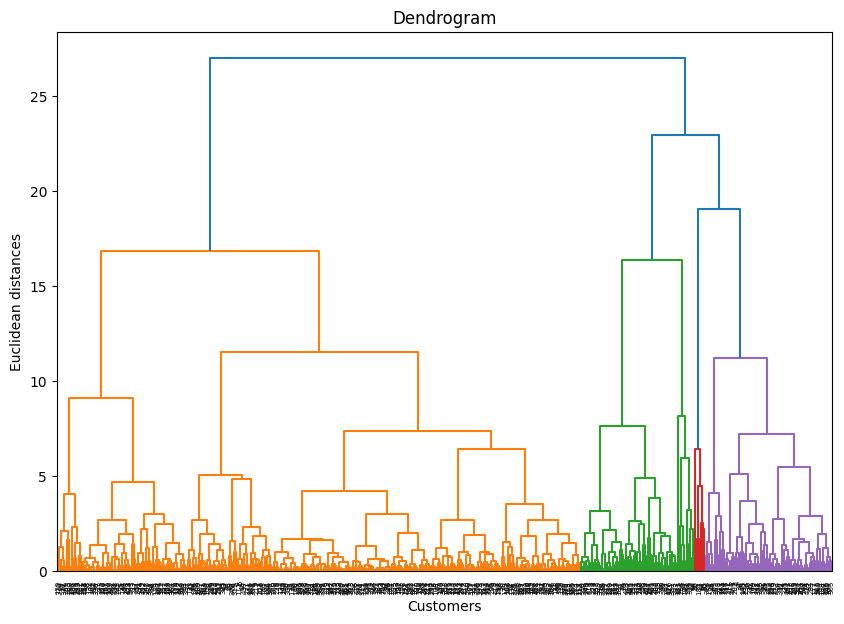

In [63]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

#Creating Clustering Model
ac = AgglomerativeClustering(metric='euclidean',
                             linkage='ward',
                             n_clusters = 3)

# fit the model
ac.fit(df_scaled)

# create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [64]:
"""
    Plot Cluster Function 
    Code provided by Compass tutorial on Hierarchical Clustering
    """
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [65]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define parameter grid
n_clusters_range = range(2, 10)  #testing different clusters
linkage_methods = ["ward", "complete", "average", "single"] #testing different links 
distance_metrics = ["euclidean", "manhattan", "cosine"] #Testin different metrics

best_score = -1 #best score starrts at the lowest
best_params = {}

# Iterate through hyperparameter combinations
for n_clusters in n_clusters_range:
    for linkage in linkage_methods:
        for metric in distance_metrics:
            if linkage == "ward" and metric != "euclidean":
                continue  # 'ward' linkage only works with 'euclidean'

            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=metric)
            labels = model.fit_predict(df_scaled)
            score = silhouette_score(df_scaled, labels)

            # Store best score
            if score > best_score:
                best_score = score
                best_params = {"n_clusters": n_clusters, "linkage": linkage, "metric": metric}

# Print the best parameters
print(f"Best Silhouette Score: {best_score:.4f}")
print(f"Best Parameters: {best_params}")


Best Silhouette Score: 0.7387
Best Parameters: {'n_clusters': 2, 'linkage': 'complete', 'metric': 'manhattan'}


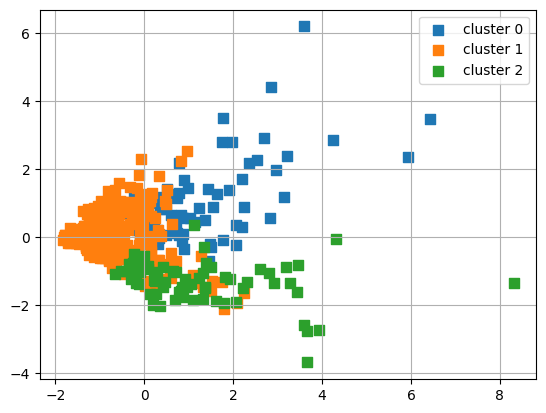

In [66]:
plot_clusters(df_pca_visual, ac.labels_)

In [67]:
#Plot using best params identified

hierarchical = AgglomerativeClustering(n_clusters=2, linkage='single', metric='euclidean')
hierarchical_labels = hierarchical.fit_predict(df_scaled)
hierarchical_silhouette = silhouette_score(df_scaled, hierarchical_labels)

print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}")


Hierarchical Clustering Silhouette Score: 0.7386965607322147


In [68]:
#Finding the best parameters for Windsorized Data

n_clusters_range = range(2, 10)  #testing different clusters
linkage_methods = ["ward", "complete", "average", "single"] #testing different links 
distance_metrics = ["euclidean", "manhattan", "cosine"] #Testin different metrics

best_score = -1 #best score starts at the lowest
best_params = {}

# Iterate through hyperparameter combinations
for n_clusters in n_clusters_range:
    for linkage in linkage_methods:
        for metric in distance_metrics:
            if linkage == "ward" and metric != "euclidean":
                continue 

            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=metric)
            labels = model.fit_predict(winsor_scaled)
            score = silhouette_score(winsor_scaled, labels)

            # Store best score
            if score > best_score:
                best_score = score
                best_params = {"n_clusters": n_clusters, "linkage": linkage, "metric": metric}

# Print the best parameters
print(f"Best Silhouette Score: {best_score:.4f}")
print(f"Best Parameters: {best_params}")

Best Silhouette Score: 0.7387
Best Parameters: {'n_clusters': 2, 'linkage': 'complete', 'metric': 'manhattan'}


In [69]:
# Testing Hierachical Clustering with Winsorized Data
hierarchical = AgglomerativeClustering(n_clusters=2, linkage='single', metric='euclidean')
hierarchical_labels = hierarchical.fit_predict(winsor_scaled)
hierarchical_silhouette_winsor = silhouette_score(winsor_scaled, hierarchical_labels)

print(f"Hierarchical Winzorized Clustering Silhouette Score: {hierarchical_silhouette_winsor}")

Hierarchical Winzorized Clustering Silhouette Score: 0.7386965607322147


C:\Users\lai29\AppData\Local\Temp\ipykernel_31068\3156767247.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=methods, y=silhouette_scores, palette="coolwarm")


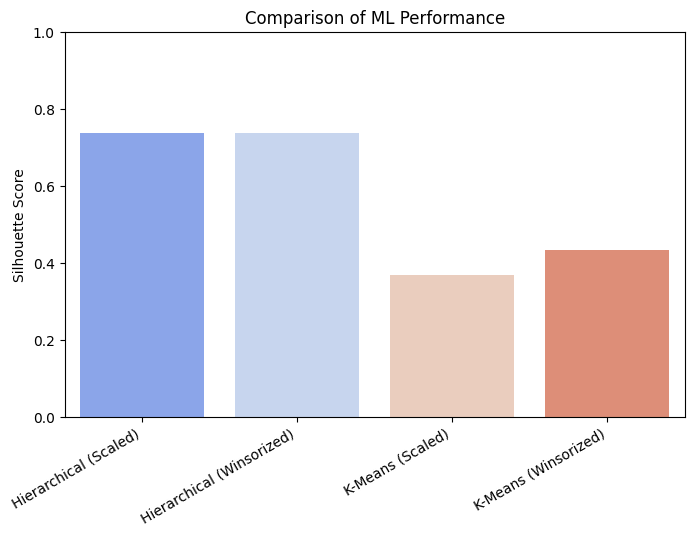

In [70]:
silhouette_scores = [
    hierarchical_silhouette, 
    hierarchical_silhouette_winsor, 
    kmeans_silhouette, 
    kmeans_silhouette_winsor
]
methods = [
    "Hierarchical (Scaled)", 
    "Hierarchical (Winsorized)", 
    "K-Means (Scaled)", 
    "K-Means (Winsorized)"
]

plt.figure(figsize=(8, 5))
sns.barplot(x=methods, y=silhouette_scores, palette="coolwarm")
plt.ylabel("Silhouette Score")
plt.title("Comparison of ML Performance")
plt.ylim(0, 1)
plt.xticks(rotation=30, ha="right")
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None) #Use maximum number of components for ML 
df_pca = pca.fit_transform(df_scaled)

df_pca

array([[-0.18438018,  0.7973645 ,  0.62207035,  0.06664758],
       [ 0.0798145 ,  0.83167964, -0.1407469 ,  0.07361622],
       [ 1.42957202,  1.40824651, -0.98052184,  1.69285795],
       ...,
       [ 0.50360278,  1.39500538,  0.66581875, -0.10324483],
       [-0.16365188,  0.22535935, -0.02192548,  1.02806753],
       [-1.65842669,  0.01628396,  0.21096379, -0.10028689]])

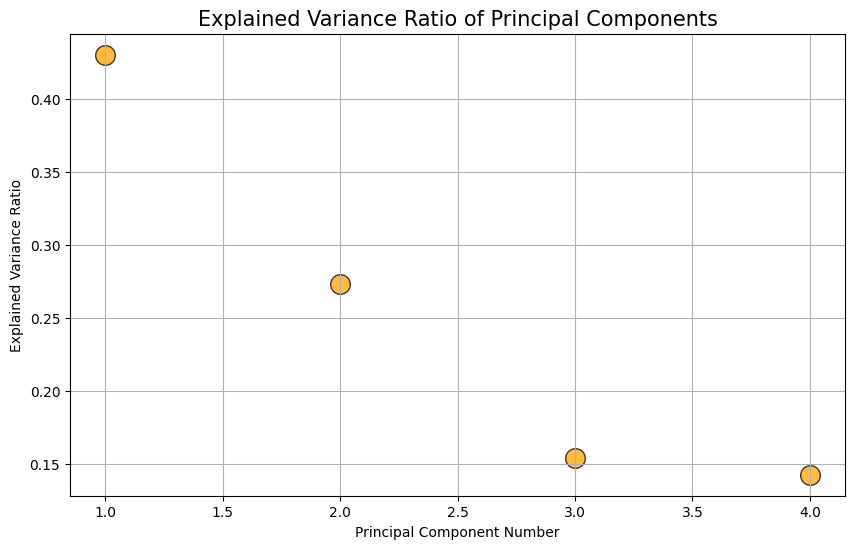

[0.43061265 0.27297416 0.15410125 0.14231194]


In [72]:
# Plot the explained variance ratio

"""
    Exlained Variance Ratio
    Determining the number of principal components
    Code from PCA Tutorial
    """
    
plt.figure(figsize=(10, 6))
plt.scatter(
    x=[i + 1 for i in range(len(pca.explained_variance_ratio_))], 
    y=pca.explained_variance_ratio_,  
    s=200, alpha=0.75, c="orange", edgecolor="k"
)
plt.grid(True)
plt.title("Explained Variance Ratio of Principal Components", fontsize=15)
plt.xlabel("Principal Component Number")
plt.ylabel("Explained Variance Ratio")
plt.show()

print(pca.explained_variance_ratio_)

In [74]:
#PCA Components
loadings = pd.DataFrame(pca.components_, columns=['Fresh', 'Milk', 'Frozen', 'Delicatessen'])

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio:", explained_variance)
print("PCA Component Loadings:\n", loadings)

Explained Variance Ratio: [0.43061265 0.27297416 0.15410125 0.14231194]
PCA Component Loadings:
       Fresh      Milk    Frozen  Delicatessen
0  0.527562  0.394826  0.494468      0.566827
1 -0.399546  0.691784 -0.503434      0.329170
2  0.747614  0.135095 -0.588514     -0.276540
3  0.055819 -0.589319 -0.394598      0.702766


In [89]:
pca = PCA(n_components=3)
df_pca_fitted = pca.fit_transform(df_scaled)

In [90]:

#Comparing ML model performance with PCA data
#Fit Hierarchical model with PCA dataset
hierarchical = AgglomerativeClustering(n_clusters=2, linkage='complete', metric='euclidean')
hierarchical_labels = hierarchical.fit_predict(df_pca_fitted)
hierarchical_silhouette_pca = silhouette_score(df_pca_fitted, hierarchical_labels)

print(f"Hierarchical PCA Clustering Silhouette Score: {hierarchical_silhouette_pca}")

Hierarchical PCA Clustering Silhouette Score: 0.6186067290756183


In [91]:
#Fit K-means model with PCA dataset
pca = PCA(n_components=2)
df_pca_fitted = pca.fit_transform(df_scaled)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
pca_model = kmeans.fit(df_pca_fitted)

kmeans_labels = pca_model.fit_predict(df_pca_fitted)
kmeans_silhouette_pca = silhouette_score(df_pca_fitted, kmeans_labels)
print(f"K-Means PCA Silhouette Score: {kmeans_silhouette_pca}")

K-Means PCA Silhouette Score: 0.5203996568255672


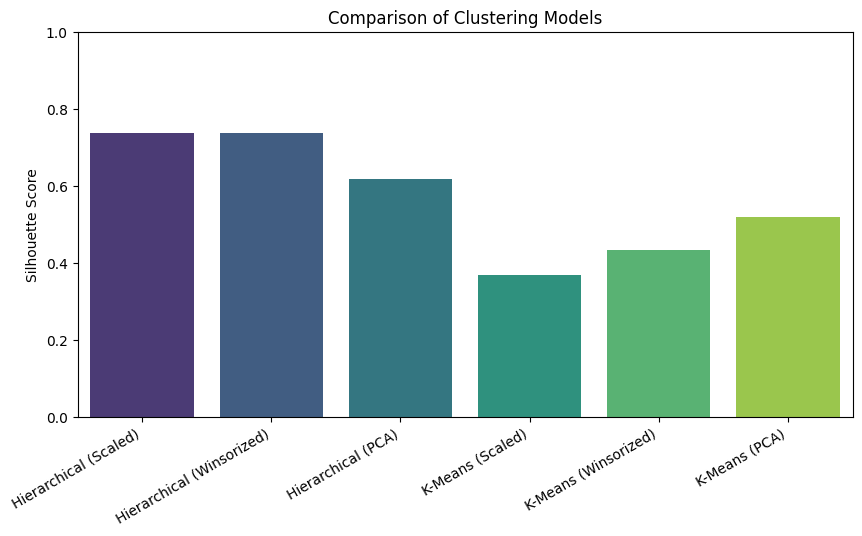

In [92]:
#Recreate plot with PCA Silhouette Scores added
silhouette_scores = [
    hierarchical_silhouette, 
    hierarchical_silhouette_winsor, 
    hierarchical_silhouette_pca,
    kmeans_silhouette, 
    kmeans_silhouette_winsor,
    kmeans_silhouette_pca
]
methods = [
    "Hierarchical (Scaled)", 
    "Hierarchical (Winsorized)",
    "Hierarchical (PCA)" ,
    "K-Means (Scaled)", 
    "K-Means (Winsorized)",
    "K-Means (PCA)"
]

# Plot Scores
plt.figure(figsize=(10, 5))
sns.barplot(x=methods, y=silhouette_scores, hue = methods, palette="viridis")
plt.ylabel("Silhouette Score")
plt.title("Comparison of Clustering Models")
plt.ylim(0, 1)
plt.xticks(rotation=30, ha="right")
plt.show()

In [93]:
print({methods[i]: silhouette_scores[i] for i in range(len(methods))}) #Printing out all silhouette scores

{'Hierarchical (Scaled)': np.float64(0.7386965607322147), 'Hierarchical (Winsorized)': np.float64(0.7386965607322147), 'Hierarchical (PCA)': np.float64(0.6186067290756183), 'K-Means (Scaled)': np.float64(0.3693473221138182), 'K-Means (Winsorized)': np.float64(0.43478048126903496), 'K-Means (PCA)': np.float64(0.5203996568255672)}


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

# EDA: 
- Overall the dataset was relatively small but fairly usable. There were not many null values or errors that needed to be corrected. The data was fairly evenly distributed. 
- Correlation Matrix was used to determine if there were any relationships between variables. Highly correlated variables were removed to reduce noise in the data and improvo the model performance. However, additional scaling work was done to outliers in the dataset. Winsorization was used to correct the outliers and to test if that improved the model performance.

# ML:

- Each model was tested with a range of metrics to determine which model performed the best. Once the best parameters were deteremined, the model was fit to the data using 3 different datasets. A scaled data, the dataset that was winsorized, and the dataset that was transformed with PCA.

- The best performing model overall was the Hierachical model. It's silhouette scores were higher than any K-means model that I tested in this project. The best performing dataset for the Hierachical model was the scaled and winsorized dataset, with both having a silhouette score of .74. For K-means, it's best performing dataset was with PCA, which improved the performance of the model with a silhouette score of 0.52.